In [39]:
#!pip install pycaret --user

In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid", palette="Dark2")

from sklearn.model_selection import train_test_split

In [41]:
df = pd.read_csv('../../Data/Processed/Occupancy_processed.csv', parse_dates=['date'])

## Divisão manual em treino-teste

In [42]:
X = df.drop(['Occupancy'], axis=1)
y = df.Occupancy

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify = df.Occupancy, test_size = 0.3, random_state = 42)

In [44]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(14392, 7) (14392,) (6168, 7) (6168,)


### Checando distribuição de classes entre as amostras

In [45]:
# checando distribuição entre as amostras
dist = pd.DataFrame(df.Occupancy.value_counts(normalize = True).values, columns = ['Dados Originais'],
                    index = df.Occupancy.value_counts().index)
dist['Treinamento'] = y_train.value_counts(normalize = True).values
dist['Teste'] = y_test.value_counts(normalize = True).values
dist

,Dados Originais,Treinamento,Teste
Empty,0.768969,0.768969,0.768969
Occupancy,0.231031,0.231031,0.231031


## Comparação de modelos com pycaret

In [46]:
from pycaret.classification import *
from pycaret.utils import enable_colab
enable_colab()

In [47]:
s = setup(data = df,
               target = 'Occupancy',
               html=False,
               ignore_features='date',
               remove_multicollinearity=True,
               session_id=42)

                    Description                   Value
0                    Session id                      42
1                        Target               Occupancy
2                   Target type                  Binary
3                Target mapping  Empty: 0, Occupancy: 1
4           Original data shape              (20560, 7)
5        Transformed data shape              (20560, 6)
6   Transformed train set shape              (14391, 6)
7    Transformed test set shape               (6169, 6)
8               Ignore features                       4
9              Numeric features                       5
10                   Preprocess                    True
11              Imputation type                  simple
12           Numeric imputation                    mean
13       Categorical imputation                constant
14       Low variance threshold                       0
15     Remove multicollinearity                    True
16  Multicollinearity threshold                 

In [48]:
best_model = compare_models()

                                    Model  Accuracy     AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.9930  0.9991  0.9883  0.9815   
lightgbm  Light Gradient Boosting Machine    0.9930  0.9992  0.9898  0.9801   
rf               Random Forest Classifier    0.9926  0.9987  0.9889  0.9792   
gbc          Gradient Boosting Classifier    0.9908  0.9978  0.9934  0.9676   
dt               Decision Tree Classifier    0.9905  0.9869  0.9802  0.9787   
lr                    Logistic Regression    0.9903  0.9945  0.9964  0.9629   
knn                K Neighbors Classifier    0.9899  0.9958  0.9901  0.9671   
ada                  Ada Boost Classifier    0.9899  0.9982  0.9922  0.9653   
ridge                    Ridge Classifier    0.9895  0.0000  0.9976  0.9588   
lda          Linear Discriminant Analysis    0.9894  0.9943  0.9979  0.9580   
svm                   SVM - Linear Kernel    0.9887  0.0000  0.9961  0.9573   
nb                            Naive Bayes    0.9791 

In [49]:
print(best_model)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=42, verbose=0, warm_start=False)


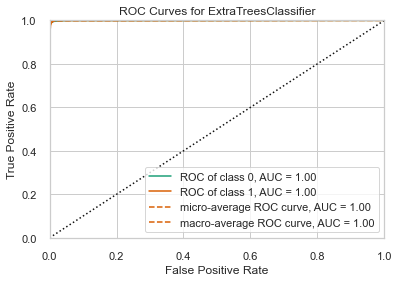

In [50]:
plot_model(best_model, plot = 'auc')

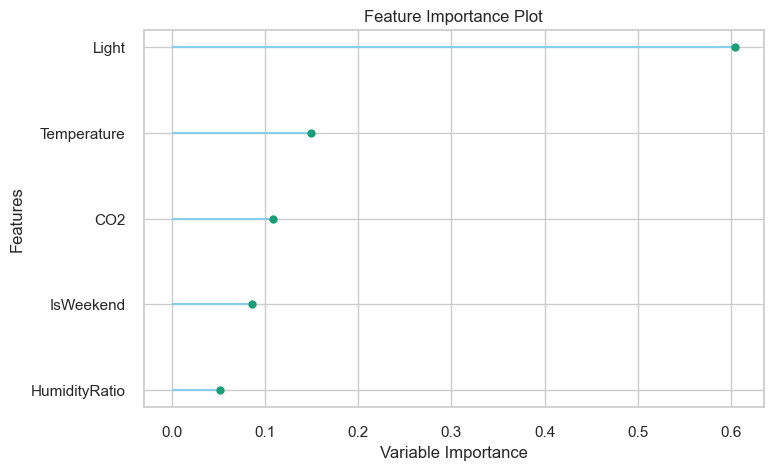

In [51]:
plot_model(best_model, plot = 'feature')

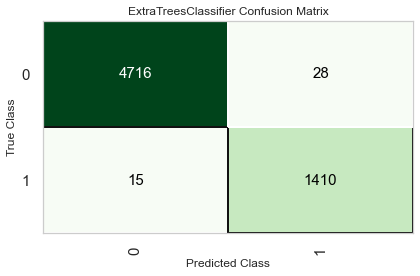

In [52]:
plot_model(best_model, plot = 'confusion_matrix')

In [53]:
predict_model(best_model)

                    Model  Accuracy     AUC  Recall  Prec.  F1   Kappa     MCC
0  Extra Trees Classifier     0.993  0.9989       0      0   0  0.9804  0.9805


,Temperature,Light,CO2,HumidityRatio,IsWeekend,Occupancy,Label,Score
14391,20.389999,0.0,513.0,0.004891,0.0,Empty,Empty,1.00
14392,21.700001,0.0,582.0,0.004587,0.0,Empty,Empty,0.99
14393,20.790001,0.0,1514.0,0.003959,0.0,Empty,Empty,1.00
14394,20.745001,0.0,1420.0,0.004101,0.0,Empty,Empty,1.00
14395,20.500000,0.0,749.0,0.004533,0.0,Empty,Empty,1.00
...,...,...,...,...,...,...,...,...
20555,20.600000,0.0,635.0,0.003375,0.0,Empty,Empty,1.00
20556,20.000000,0.0,539.0,0.005168,1.0,Empty,Empty,1.00
20557,19.290001,6.0,436.5,0.004288,1.0,Empty,Empty,1.00
20558,20.200001,0.0,444.0,0.003097,0.0,Empty,Empty,1.00
